In [3]:
!pip install -q scanpy anndata igraph leidenalg

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.6 MB/s eta 0:00:00


In [30]:
import warnings
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import igraph
import leidenalg
import scipy
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
warnings.filterwarnings('ignore')

In [5]:
adata = sc.read_h5ad('/content/drive/MyDrive/anndata.h5ad')

In [6]:
def BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors=10, n_pcs = 40, random_state = 20):
  sc.pp.normalize_total(adata, target_sum = 1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor = 'seurat')
  #sc.pp.scale(adata, max_value=10)
  sc.tl.pca(adata, svd_solver = 'arpack')
  sc.pp.neighbors(adata, n_neighbors = n_neighbors, n_pcs = n_pcs, random_state = random_state)
  sc.tl.umap(adata, random_state = random_state)
  sc.tl.tsne(adata, random_state = random_state)
  sc.tl.leiden(adata, random_state = random_state)
  return adata

In [34]:
adata = BasicScanpyPreprocessing(adata)

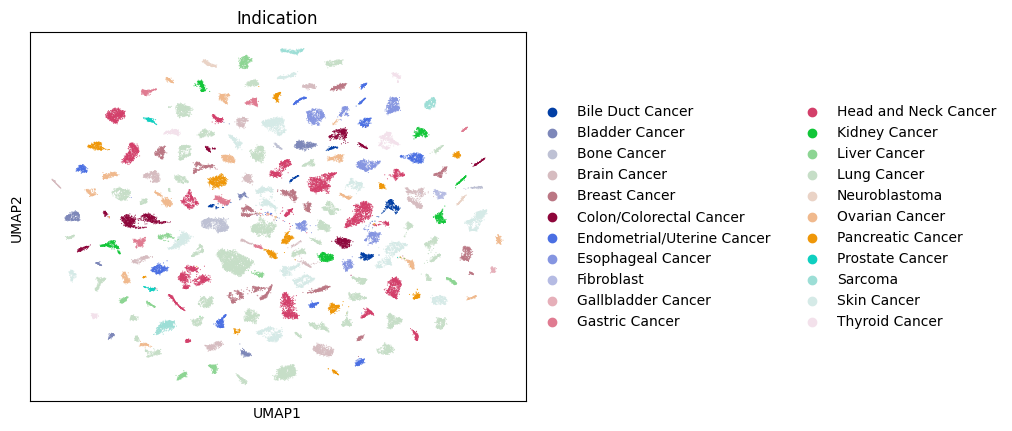

In [10]:
sc.pl.umap(adata, color = ['Indication'])

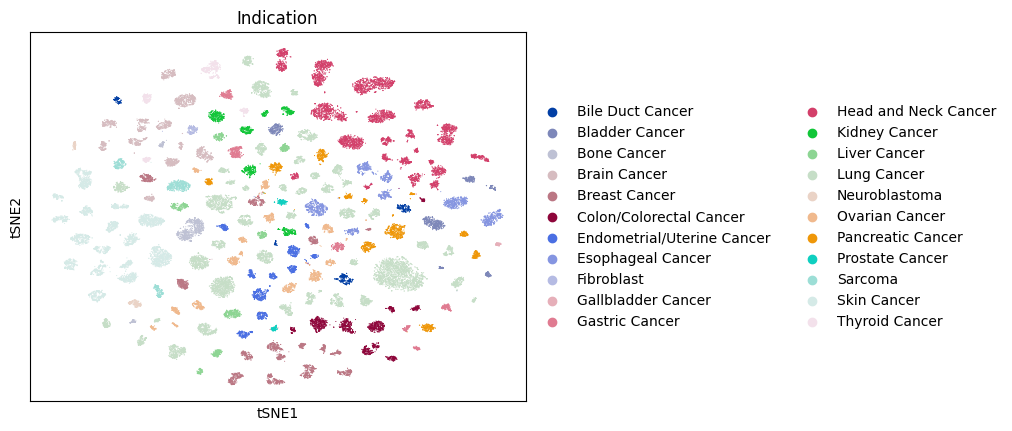

In [11]:
sc.pl.tsne(adata, color = ['Indication'])

In [12]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

In [13]:
def ExploreCellLines(gene, indication = 'Indication'):
  if(indication != 'Indication'):
    adata_indication = adata[adata.obs.Indication==indication].copy()
    df = sc.get.obs_df(adata_indication, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['CellLine'] = adata_indication.obs['CellLine']
    sns.boxplot(data = df, x = 'CellLine', y = gene, hue = 'CellLine', showfliers = False)
    sns.stripplot(data = df, x = 'CellLine', y = gene, color = 'black', size = 1, jitter = True)
    plt.xticks(rotation = 90)
  else:
    df = sc.get.obs_df(adata, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['Indication'] = adata.obs['Indication']
    sns.boxplot(data = df, x = 'Indication', y = gene, hue = 'Indication', showfliers = False)
    sns.stripplot(data = df, x = 'Indication', y = gene, color = 'black', size = 0.5, jitter = True)
    plt.xticks(rotation = 90)

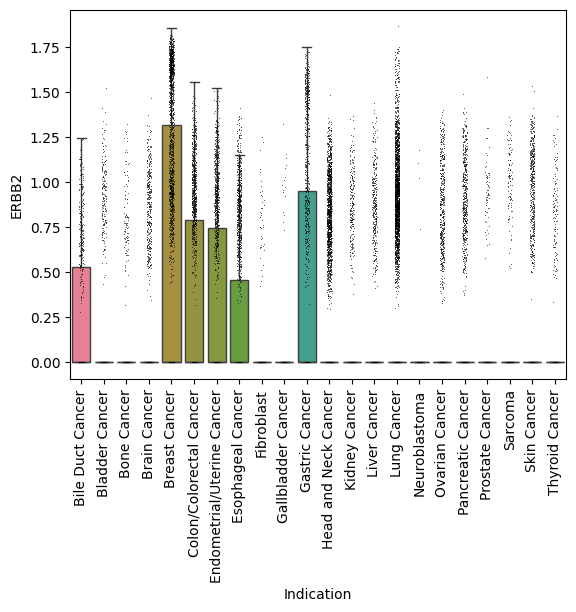

In [14]:
ExploreCellLines('ERBB2')

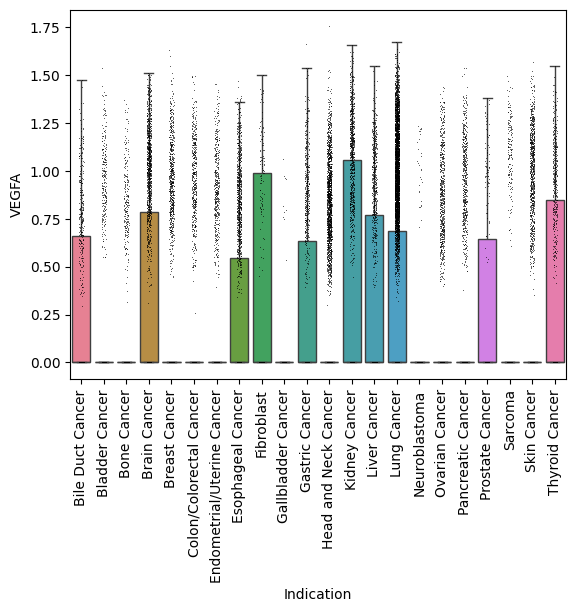

In [15]:
ExploreCellLines('VEGFA')

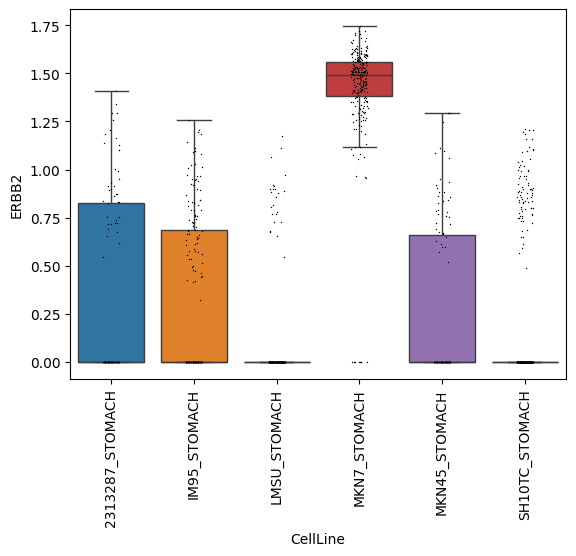

In [16]:
ExploreCellLines('ERBB2', 'Gastric Cancer')

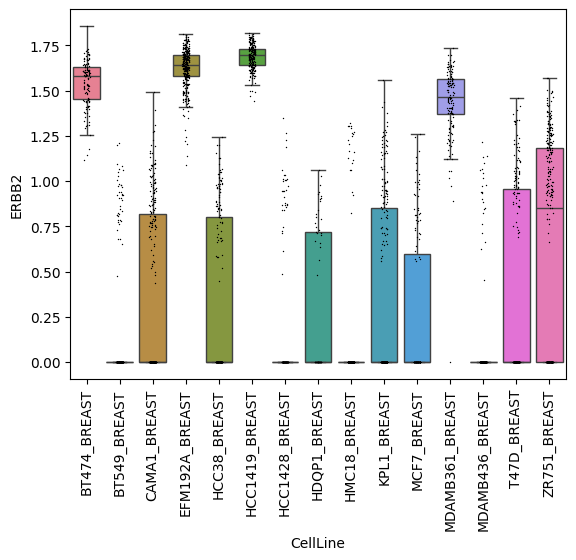

In [17]:
ExploreCellLines('ERBB2', 'Breast Cancer')

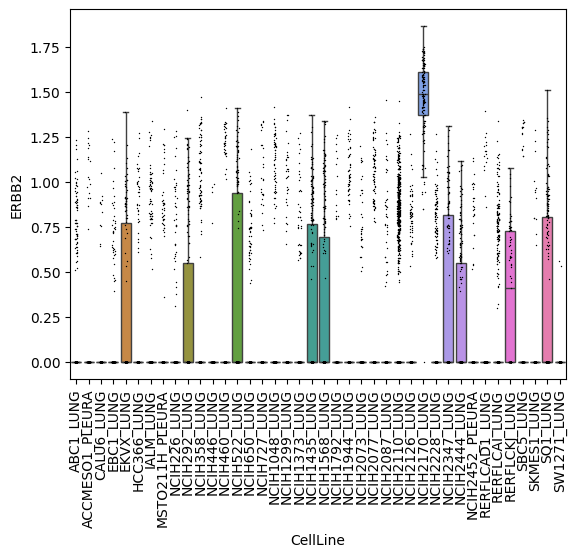

In [18]:
ExploreCellLines('ERBB2', 'Lung Cancer')

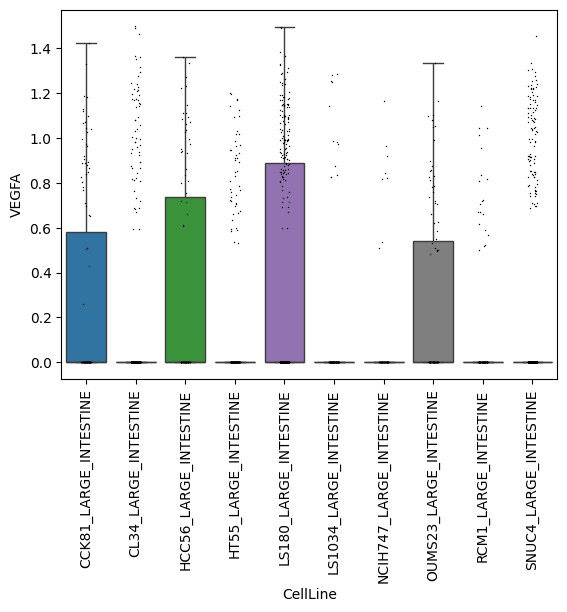

In [19]:
ExploreCellLines('VEGFA', 'Colon/Colorectal Cancer')

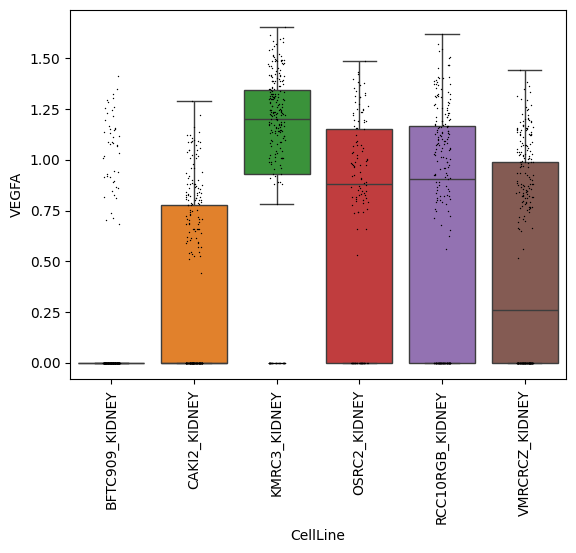

In [20]:
ExploreCellLines('VEGFA', 'Kidney Cancer')

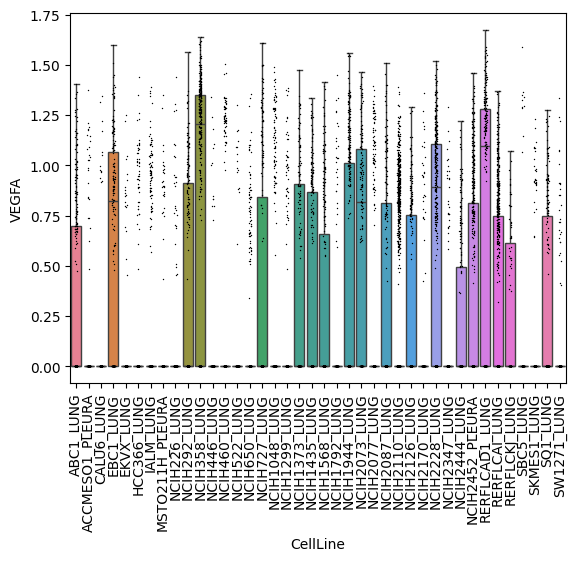

In [21]:
ExploreCellLines('VEGFA', 'Lung Cancer')

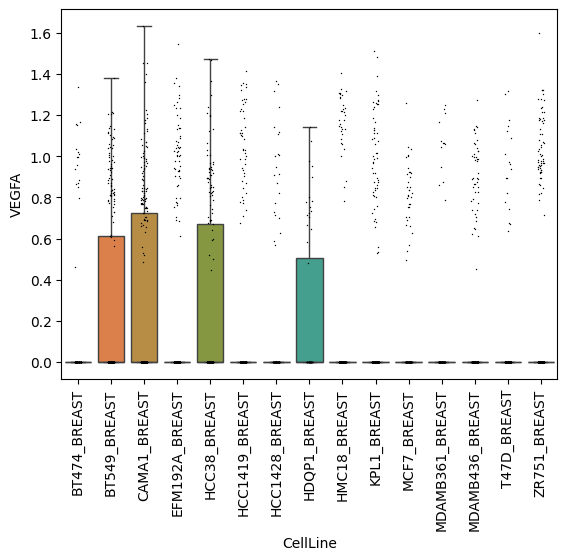

In [22]:
ExploreCellLines('VEGFA', 'Breast Cancer')

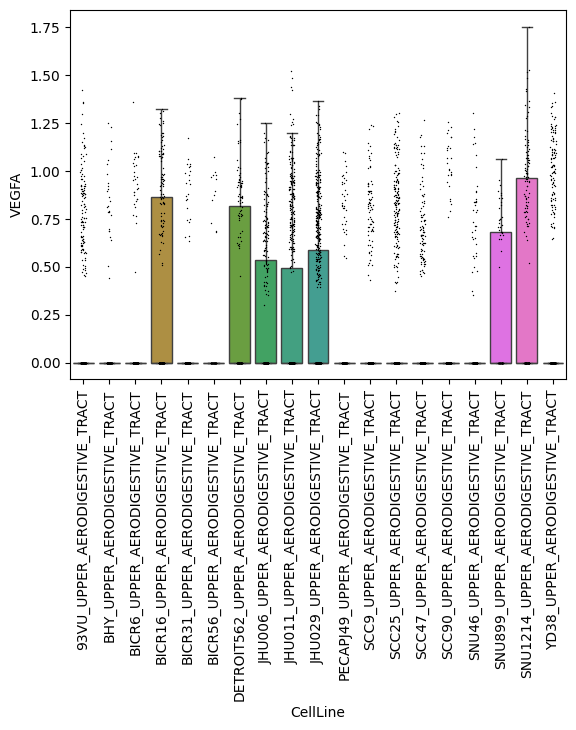

In [23]:
ExploreCellLines('VEGFA', 'Head and Neck Cancer')

In [24]:
adata.obs.head()

,CellLine,Pool,Indication,Genes_expressed,Discrete_cluster_minpts5_eps1.8,Discrete_cluster_minpts5_eps1.5,Discrete_cluster_minpts5_eps1.2,CNA_subclone,SkinPig_score,EMTI_score,...,IFNResp_score,p53Sen_score,EpiSen_score,StressResp_score,ProtMatu_score,ProtDegra_score,G1/S_score,G2/M_score,n_genes,leiden
AAACCTGAGACATAAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4318,nan,nan,nan,nan,0.166,-0.045,...,0.130,0.619,1.869,-0.004,0.805,0.896,0.424,-1.125,4323,82
AAACCTGCACAACGCC-1-18,SW579_THYROID,18,Thyroid Cancer,5021,nan,nan,SW579_THYROID_1,nan,-0.056,0.776,...,-0.266,-0.334,-1.125,-0.039,-0.243,-0.642,-0.173,1.365,5034,111
AAACCTGCAGACAAGC-1-18,C32_SKIN,18,Skin Cancer,3047,nan,nan,nan,nan,1.092,0.617,...,0.318,0.570,-0.165,0.074,0.250,0.096,-0.367,-1.135,3055,17
AAACCTGCAGCTCGAC-1-18,SW579_THYROID,18,Thyroid Cancer,2765,nan,nan,SW579_THYROID_1,nan,-0.601,1.038,...,0.341,-0.253,-0.552,0.921,2.876,1.645,0.226,0.469,2769,111
AAACCTGCATGGATGG-1-18,NCIH446_LUNG,18,Lung Cancer,2064,nan,nan,nan,nan,-0.251,-0.325,...,-0.044,-1.256,-0.367,-0.317,0.790,1.925,0.138,-0.384,2065,121


In [25]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df_cell_line = sc.get.obs_df(adata_lung, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
df_cell_line['CellLine'] = adata_lung.obs['CellLine']
df_cell_line.head()

,ERBB2,VEGFA,VEGFB,CellLine
AAACCTGAGACATAAC-1-18,0.000000,0.74719,0.999149,NCIH2126_LUNG
AAACCTGCATGGATGG-1-18,0.000000,0.00000,0.000000,NCIH446_LUNG
AAACGGGGTTTAGGAA-1-18,0.000000,0.00000,0.000000,NCIH2452_PLEURA
AAAGATGGTGCGGTAA-1-18,1.135225,0.00000,0.000000,NCIH2452_PLEURA
AAATGCCGTCACCTAA-1-18,0.000000,0.00000,0.000000,NCIH446_LUNG


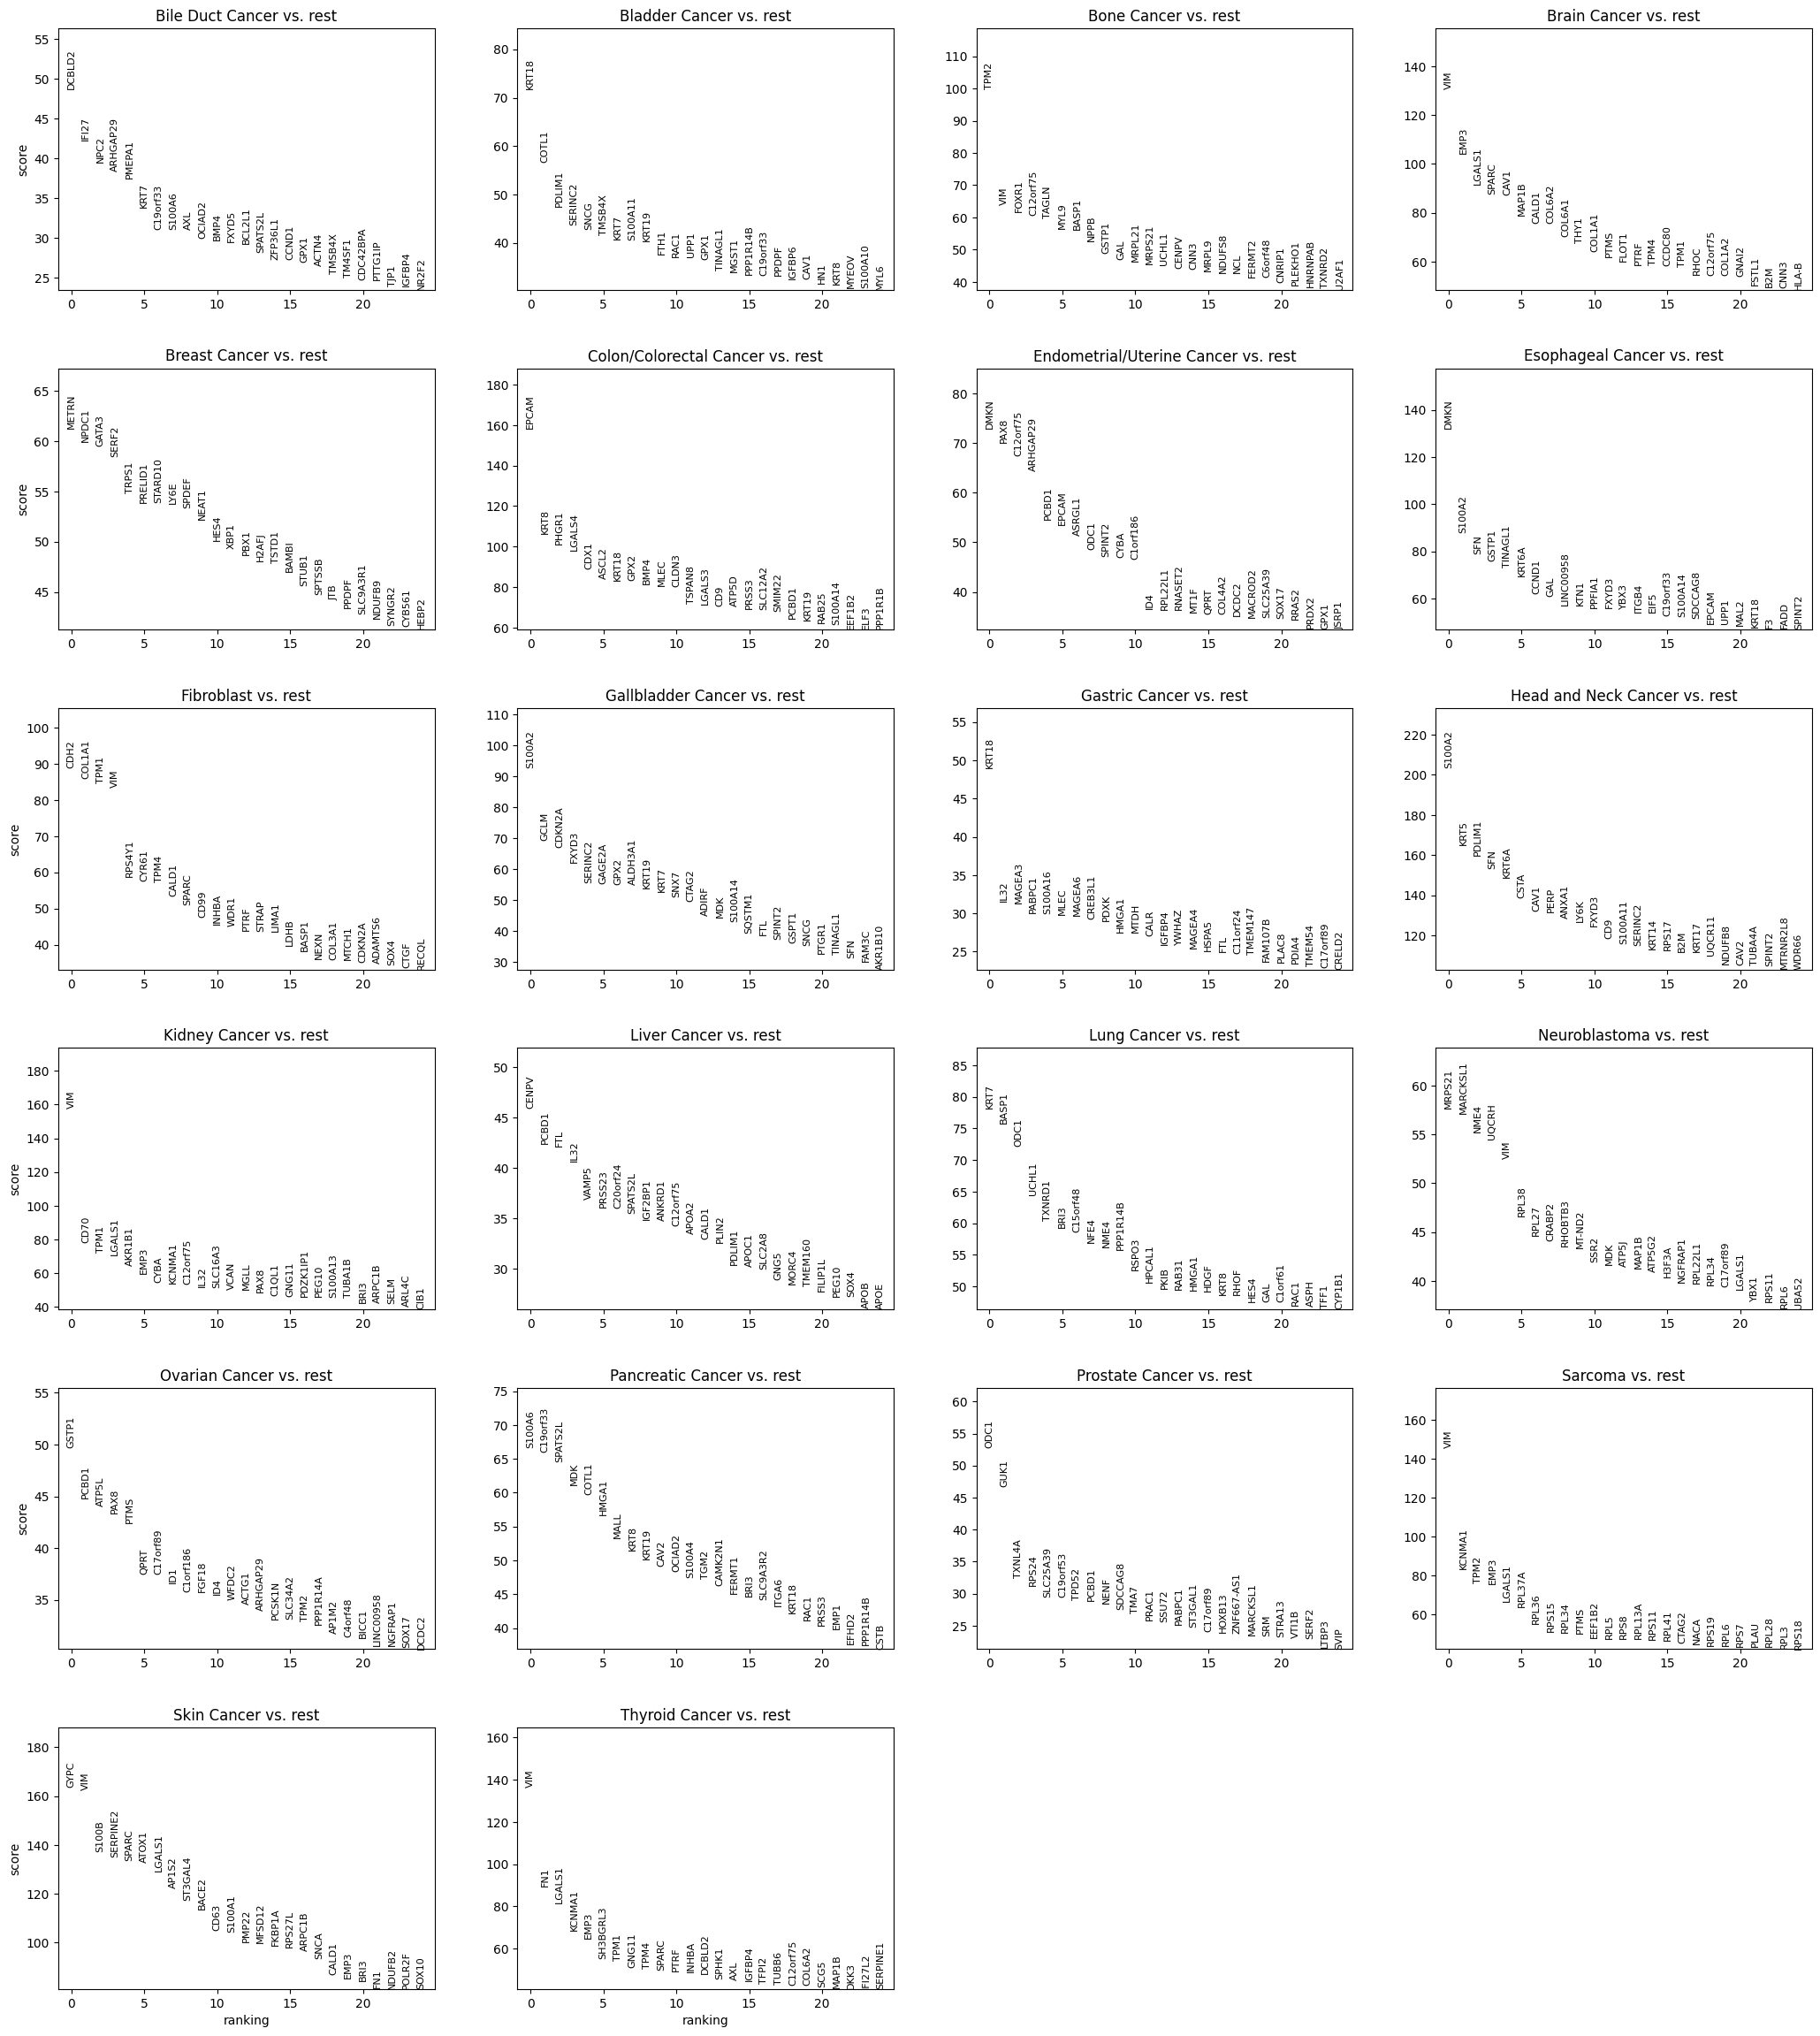

In [32]:
# Differential expression analysis
sc.tl.rank_genes_groups(adata, groupby = 'Indication', method = 't-test', key_added = 't_test')
sc.pl.rank_genes_groups(adata, groupby = 'Indication', n_genes = 25, sharey = False, key = 't_test')

In [33]:
sc.tl.rank_genes_groups(adata, groupby = 'CellLine', method = 't-test', key_added = 't_test')
sc.pl.rank_genes_groups(adata, groupby = 'CellLine', n_genes = 25, sharey = False, key = 't_test')

Output hidden; open in https://colab.research.google.com to view.

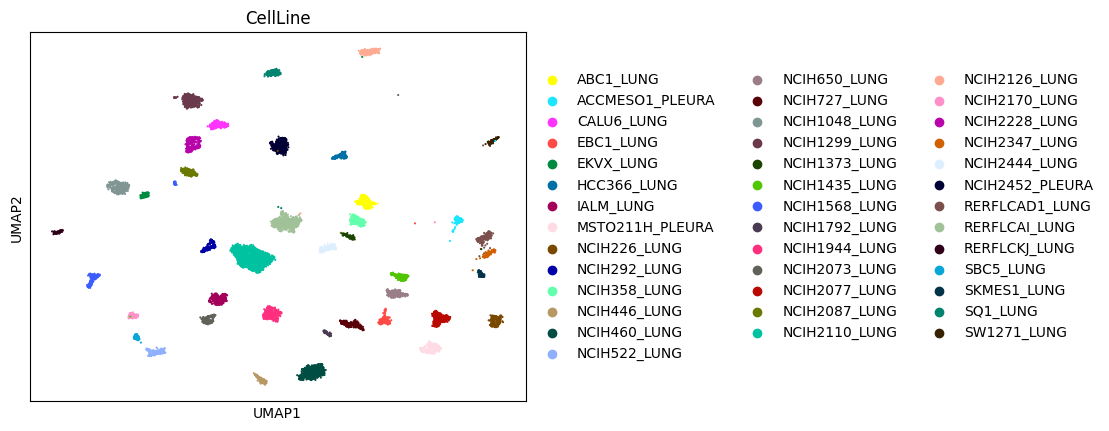

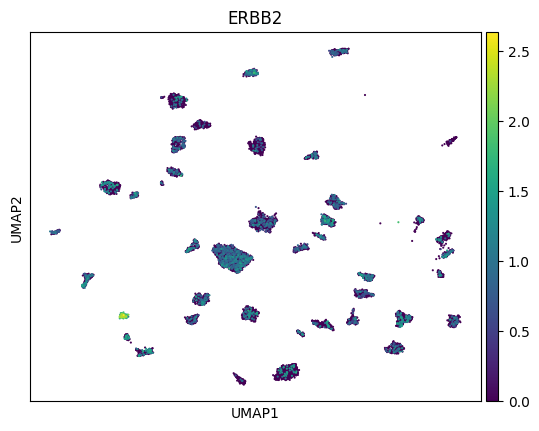

In [35]:
sc.pl.umap(adata_lung, color = ['CellLine'])
sc.pl.umap(adata_lung, color = ['ERBB2'])

In [36]:
df_lung_target = df_cell_line[df_cell_line['CellLine']=='NCIH2170_LUNG'].copy()
df_lung_others = df_cell_line[df_cell_line['CellLine']!='NCIH2170_LUNG'].copy()

In [37]:
t_stat, p_value = stats.ttest_ind(df_lung_target['ERBB2'], df_lung_others['ERBB2'], equal_var = False)
print(f"T statistic: {t_stat} \n P value: {p_value}")
f_stat, p_value = stats.f_oneway(df_lung_target['ERBB2'], df_lung_others['ERBB2'])
print(f"F statistic: {f_stat} \n P value: {p_value}")

T statistic: 64.3661577907562 
 P value: 3.7084172163137236e-110
F statistic: 1903.0592002389396 
 P value: 0.0


In [38]:
tukey_result = pairwise_tukeyhsd(endog = df_cell_line['ERBB2'], groups = df_cell_line['CellLine'], alpha = 0.05)
print(tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
      ABC1_LUNG ACCMESO1_PLEURA  -0.0697 0.9909 -0.1995  0.0602  False
      ABC1_LUNG      CALU6_LUNG  -0.1445 0.0005 -0.2574 -0.0316   True
      ABC1_LUNG       EBC1_LUNG  -0.0199    1.0 -0.1441  0.1043  False
      ABC1_LUNG       EKVX_LUNG   0.0937 0.7595 -0.0408  0.2282  False
      ABC1_LUNG     HCC366_LUNG  -0.0188    1.0 -0.1399  0.1023  False
      ABC1_LUNG       IALM_LUNG  -0.0011    1.0 -0.1076  0.1055  False
      ABC1_LUNG MSTO211H_PLEURA  -0.0594  0.988 -0.1681  0.0494  False
      ABC1_LUNG   NCIH1048_LUNG  -0.0212    1.0 -0.1225  0.0802  False
      ABC1_LUNG   NCIH1299_LUNG    -0.12 0.0008 -0.2156 -0.0244   True
      ABC1_LUNG   NCIH1373_LUNG    0.022    1.0 -0.1074  0.1513  False
      ABC1_LUNG   NCIH1435_LUNG    0.101  0.165 -0.0109  0.2128  False
      

In [43]:
adata_hnscc = adata[adata.obs.Indication=='Head and Neck Cancer'].copy()
df_cell_lines = sc.get.obs_df(adata_hnscc, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
df_cell_lines['CellLine'] = adata_hnscc.obs['CellLine']
df_cell_lines.head()

,ERBB2,VEGFA,VEGFB,CellLine
AAAGCAACACTTGGAT-1-18,0.0,0.000000,0.714607,SNU899_UPPER_AERODIGESTIVE_TRACT
AAATGCCAGCCGCCTA-1-18,0.0,0.000000,0.000000,SNU899_UPPER_AERODIGESTIVE_TRACT
ACCAGTACAGTAACGG-1-18,0.0,0.501400,0.738572,SNU899_UPPER_AERODIGESTIVE_TRACT
ACGAGGATCGGCTACG-1-18,0.0,0.706546,0.000000,SNU899_UPPER_AERODIGESTIVE_TRACT
AGCCTAAAGATCGATA-1-18,0.0,0.716870,0.000000,SNU899_UPPER_AERODIGESTIVE_TRACT


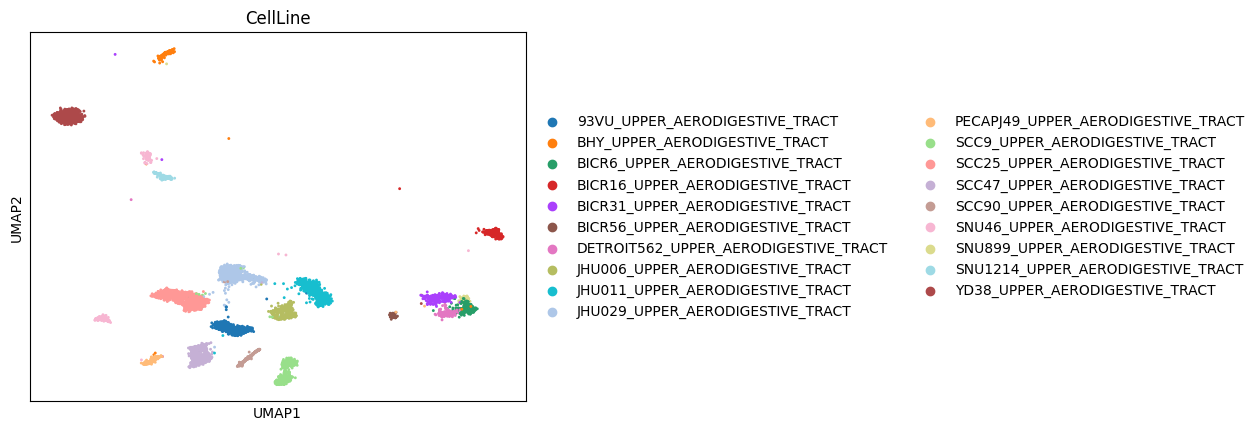

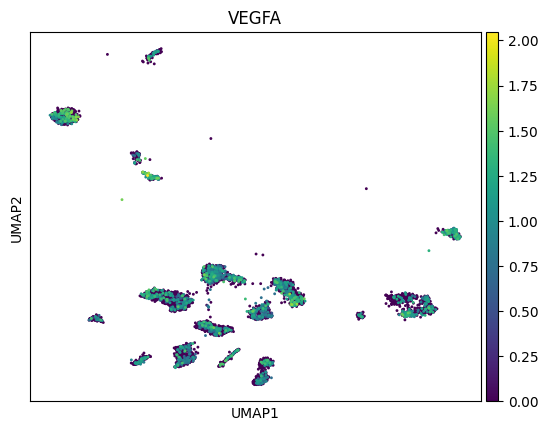

In [44]:
sc.pl.umap(adata_hnscc, color = ['CellLine'])
sc.pl.umap(adata_hnscc, color = ['VEGFA'])

In [45]:
df_hnscc_target = df_cell_lines[df_cell_lines['CellLine']=='SNU1214_UPPER_AERODIGESTIVE_TRACT'].copy()
df_hnscc_others = df_cell_lines[df_cell_lines['CellLine']!='SNU1214_UPPER_AERODIGESTIVE_TRACT'].copy()

In [46]:
t_stat, p_value = stats.ttest_ind(df_hnscc_target['VEGFA'], df_hnscc_others['VEGFA'], equal_var = False)
print(f"T statistic: {t_stat} \n P value: {p_value}")
f_stat, p_value = stats.f_oneway(df_hnscc_target['VEGFA'], df_hnscc_others['VEGFA'])
print(f"F statistic: {f_stat} \n P value: {p_value}")

T statistic: 7.389285621117972 
 P value: 4.4295413494416916e-12
F statistic: 111.97063093988326 
 P value: 5.657090791299841e-26


In [47]:
tukey_result = pairwise_tukeyhsd(endog = df_cell_lines['VEGFA'], groups = df_cell_lines['CellLine'], alpha = 0.05)
print(tukey_result)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
      93VU_UPPER_AERODIGESTIVE_TRACT        BHY_UPPER_AERODIGESTIVE_TRACT  -0.0109    1.0 -0.1275  0.1058  False
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR16_UPPER_AERODIGESTIVE_TRACT   0.2353    0.0  0.1345  0.3362   True
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR31_UPPER_AERODIGESTIVE_TRACT  -0.0816 0.2107  -0.177  0.0138  False
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR56_UPPER_AERODIGESTIVE_TRACT  -0.0329    1.0 -0.1818   0.116  False
      93VU_UPPER_AERODIGESTIVE_TRACT      BICR6_UPPER_AERODIGESTIVE_TRACT  -0.0662 0.5063 -0.1571  0.0246  False
      93VU_UPPER_AERODIGESTIVE_TRACT DETROIT562_UPPER_AERODIGESTIVE_TRACT    0.179    0.0  0.067